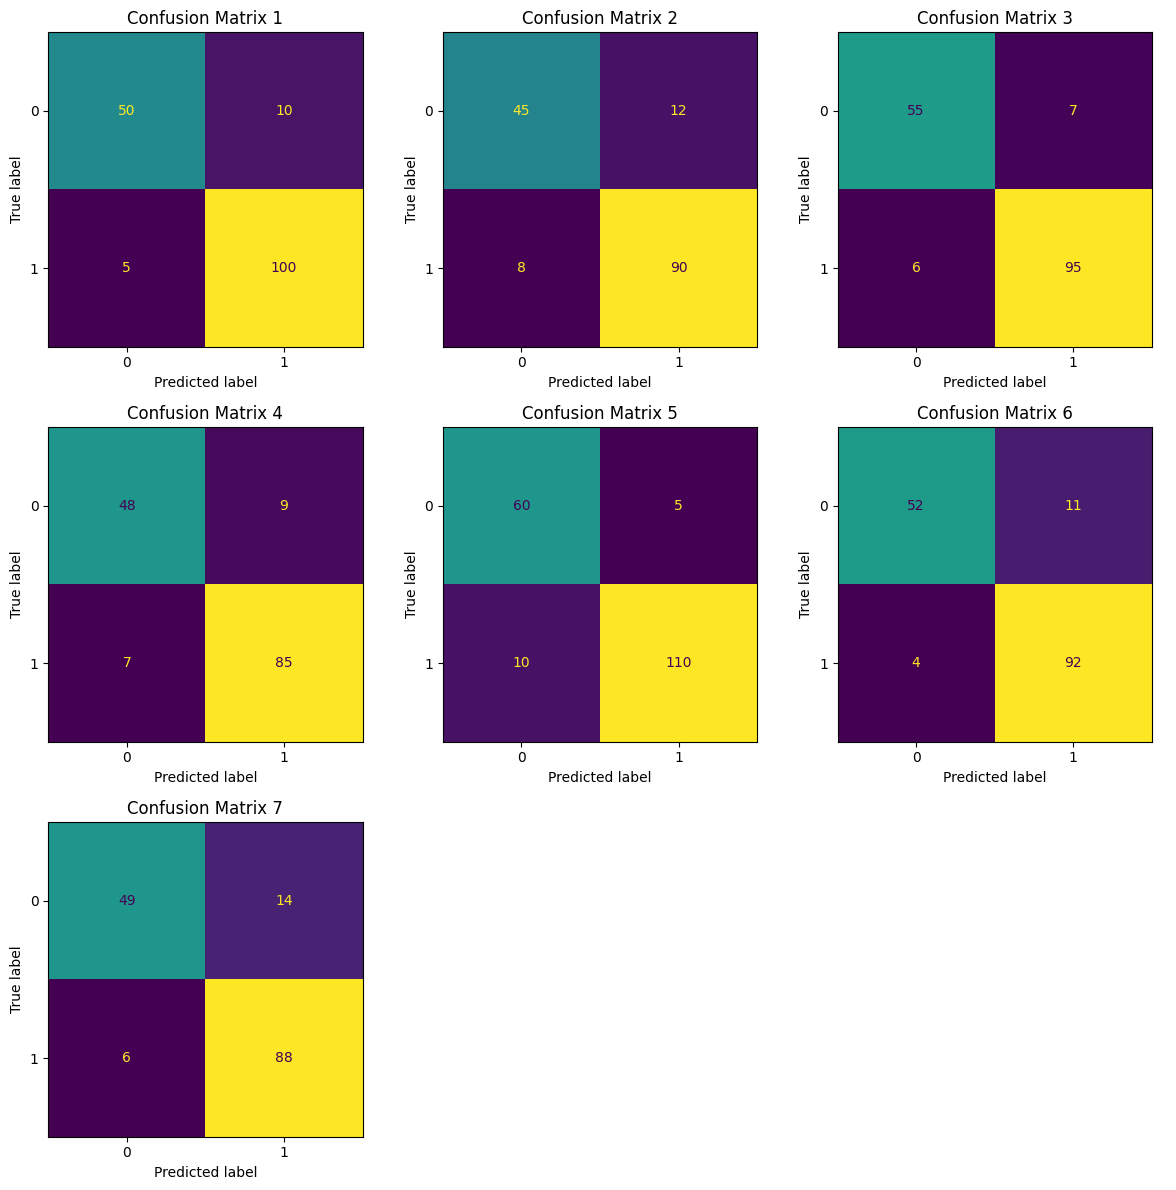

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Example input: list of (TN, FP, FN, TP) for 7 confusion matrices
conf_matrices_data = [
    (50, 10, 5, 100),
    (45, 12, 8, 90),
    (55, 7, 6, 95),
    (48, 9, 7, 85),
    (60, 5, 10, 110),
    (52, 11, 4, 92),
    (49, 14, 6, 88),
]

n_matrices = len(conf_matrices_data)

# Calculate grid size (e.g., 3x3 grid for 7 matrices)
rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i, (TN, FP, FN, TP) in enumerate(conf_matrices_data):
    cm = np.array([[TN, FP],
                   [FN, TP]])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f'Confusion Matrix {i+1}')

# Hide any extra subplots
for j in range(n_matrices, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

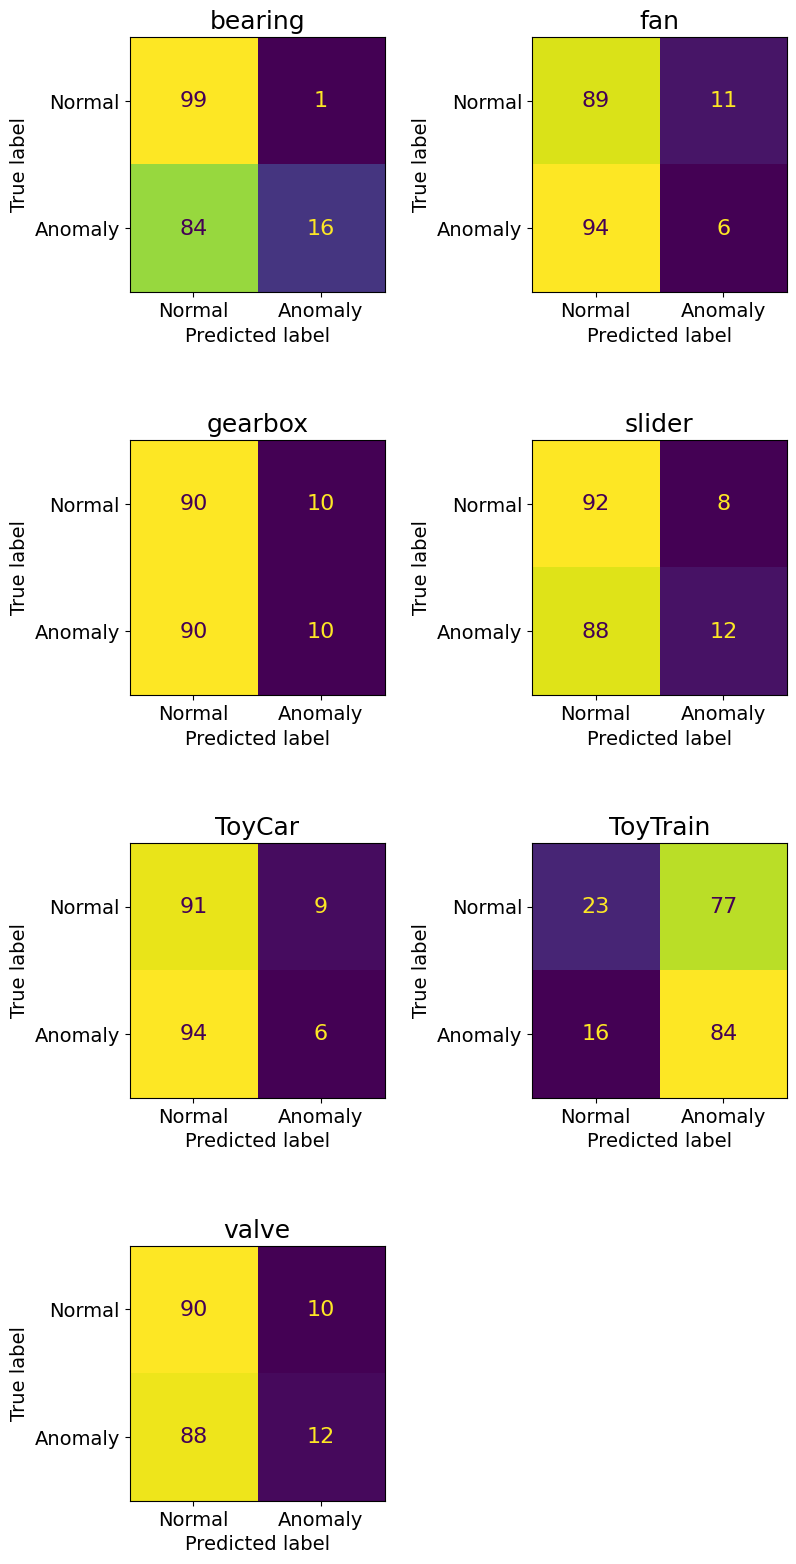

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrices_data = [
    (99, 1, 84, 16),
    (89, 11, 94, 6),
    (90, 10, 90, 10),
    (92, 8, 88, 12),
    (91, 9, 94, 6),
    (23, 77, 16, 84),
    (90, 10, 88, 12),
]

titles = ["bearing", "fan", "gearbox", "slider", "ToyCar", "ToyTrain", "valve"]

rows, cols = 4, 2

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i, (TN, FP, FN, TP) in enumerate(conf_matrices_data):
    cm = np.array([[TN, FP],
                   [FN, TP]])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
    disp.plot(ax=axes[i], colorbar=False)

    axes[i].set_title(titles[i], fontsize=18)
    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].set_xlabel("Predicted label", fontsize=14)
    axes[i].set_ylabel("True label", fontsize=14)

    for text in disp.text_.ravel():
        text.set_fontsize(16)

axes[-1].axis('off')

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

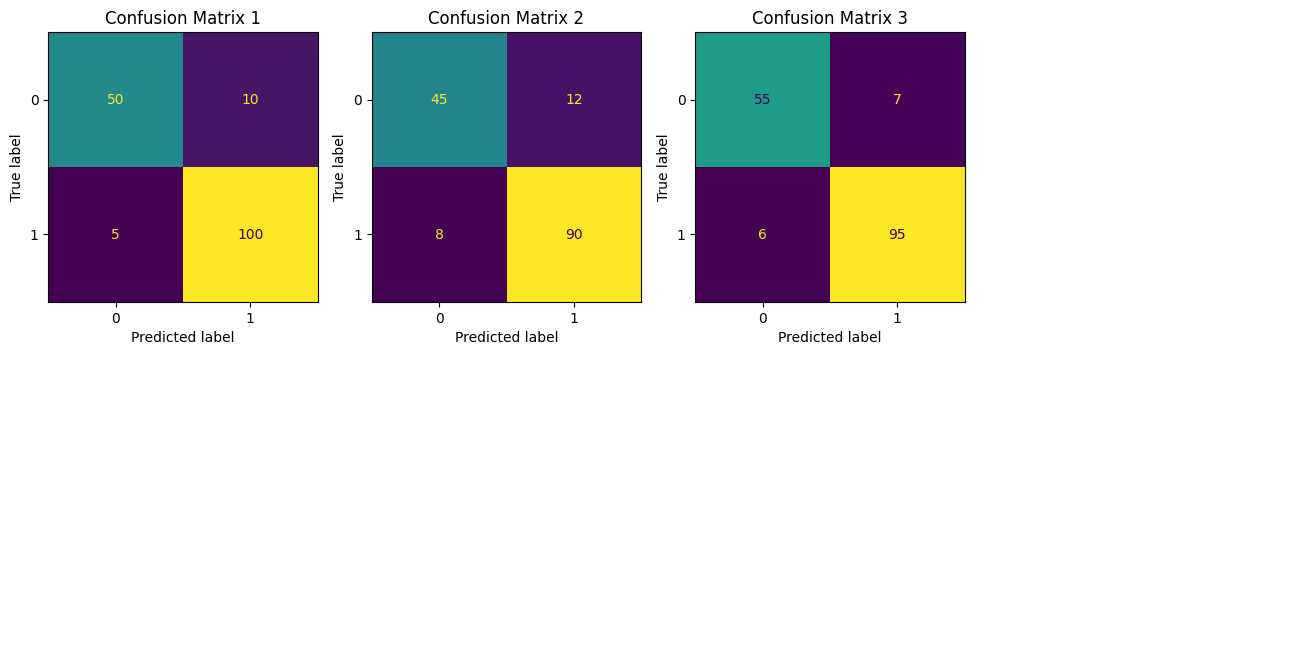

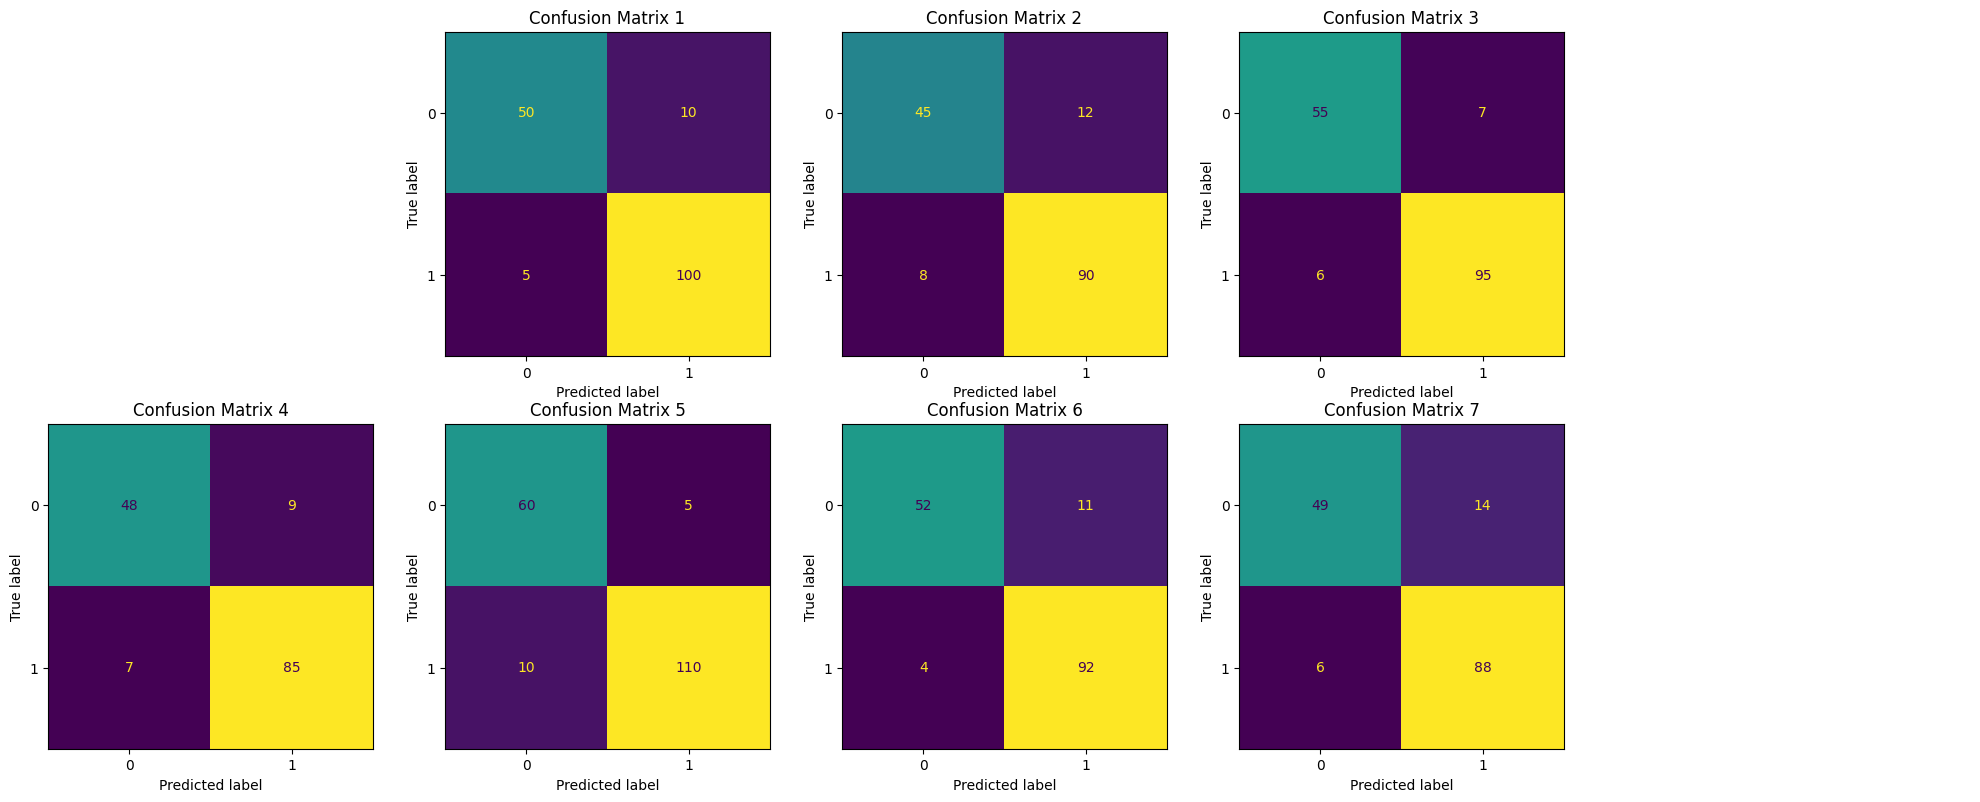

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Your data: 7 confusion matrices (TN, FP, FN, TP)
conf_matrices_data = [
    (50, 10, 5, 100),
    (45, 12, 8, 90),
    (55, 7, 6, 95),
    (48, 9, 7, 85),
    (60, 5, 10, 110),
    (52, 11, 4, 92),
    (49, 14, 6, 88),
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Plot top row (3 matrices in first 3 slots)
for i in range(3):
    TN, FP, FN, TP = conf_matrices_data[i]
    cm = np.array([[TN, FP],
                   [FN, TP]])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f'Confusion Matrix {i+1}')

# Hide the unused subplot in top row (4th column)
axes[3].axis('off')

# Plot bottom row (matrices 4 to 7) centered in the middle 3 columns (indices 4,5,6)
for i in range(4):
    TN, FP, FN, TP = conf_matrices_data[i + 3]
    ax_index = i + 4  # starts at index 4
    if ax_index == 4:  # leave index 4 empty for centering, so shift plots one to right
        axes[4].axis('off')  # left empty
    # Plot at indices 5,6,7 for matrices 4,5,6,7 respectively
# Instead, better to do this way:

# Clear bottom row and reassign so that bottom row plots go to positions 5,6,7 (axes indices)
for ax_idx in [4, 5, 6, 7]:
    axes[ax_idx].clear()
    axes[ax_idx].axis('off')

# Plot bottom 4 matrices in axes 5,6,7 (middle three columns), leaving axes 4 and 7 empty
bottom_positions = [5, 6, 7]  # only 3 positions to plot 4 matrices — we have 4 matrices total, so instead:

# Since 4 matrices must be plotted bottom, but only 3 centered positions are free, to center 3 on bottom, plot only 3 matrices on bottom.

# Wait, we want 3 matrices top, 4 bottom centered, bottom three centered means leaving one empty spot left or right.

# Let's try this:
# - top row: 3 matrices on axes[0,1,2], axes[3] empty
# - bottom row: 4 matrices on axes[4,5,6,7]
# But to center bottom three, hide axes[4] and plot 3 matrices on axes[5,6,7]

# So only 3 matrices on bottom, total 6 matrices, but user wants 7 total.

# So best is:

# 2 rows, 5 columns layout
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# top 3 matrices centered in top 5 columns: plot in axes 1,2,3
for i in range(3):
    TN, FP, FN, TP = conf_matrices_data[i]
    cm = np.array([[TN, FP],
                   [FN, TP]])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=axes[i+1], colorbar=False)
    axes[i+1].set_title(f'Confusion Matrix {i+1}')

# hide unused top row axes (0,4)
axes[0].axis('off')
axes[4].axis('off')

# bottom row 4 matrices centered in bottom 5 columns: plot in axes 5,6,7,8
for i in range(4):
    TN, FP, FN, TP = conf_matrices_data[i+3]
    cm = np.array([[TN, FP],
                   [FN, TP]])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=axes[i+5], colorbar=False)
    axes[i+5].set_title(f'Confusion Matrix {i+4}')

# hide unused bottom row axes (9)
axes[9].axis('off')

plt.tight_layout()
plt.show()
